In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("Case_Level2.csv")
data.head(10)

,Call,Time,Duration of calls
0,2737,28,6
1,6710,42,6
2,9332,85,4
3,6183,121,6
4,8297,157,4
5,6877,165,5
6,3517,166,5
7,3131,169,8
8,9688,170,6
9,9344,177,5


In [27]:
data['starttime'] = pd.to_timedelta(data['Time'], unit='m')

In [28]:
data['endtime'] = data['starttime'] + pd.to_timedelta(data['Duration of calls'], unit='m')

In [29]:
data.head(10)

,Call,Time,Duration of calls,starttime,endtime
0,2737,28,6,00:28:00,00:34:00
1,6710,42,6,00:42:00,00:48:00
2,9332,85,4,01:25:00,01:29:00
3,6183,121,6,02:01:00,02:07:00
4,8297,157,4,02:37:00,02:41:00
5,6877,165,5,02:45:00,02:50:00
6,3517,166,5,02:46:00,02:51:00
7,3131,169,8,02:49:00,02:57:00
8,9688,170,6,02:50:00,02:56:00
9,9344,177,5,02:57:00,03:02:00


In [30]:
data.tail(20)

,Call,Time,Duration of calls,starttime,endtime
9980,9649,1232,7,20:32:00,20:39:00
9981,1116,1234,3,20:34:00,20:37:00
9982,5660,1238,6,20:38:00,20:44:00
9983,4378,1244,8,20:44:00,20:52:00
9984,5787,1245,4,20:45:00,20:49:00
9985,4766,1247,4,20:47:00,20:51:00
9986,2272,1248,4,20:48:00,20:52:00
9987,7810,1249,4,20:49:00,20:53:00
9988,1624,1251,4,20:51:00,20:55:00
9989,8114,1262,6,21:02:00,21:08:00


In [31]:
#Check the call ids
data['Call'].nunique()

10000

In [93]:
dtable = pd.DataFrame(np.arange(1, 1441), columns=['time'])
dtable['time'] = pd.to_timedelta(dtable['time'], unit='m')
dtable['n_people'] = dtable['time'].apply(lambda x: len(data[(data['starttime'] <= x) & (data['endtime'] > x)]))
dtable.head()

,time,n_people
0,00:01:00,0
1,00:02:00,0
2,00:03:00,0
3,00:04:00,0
4,00:05:00,0


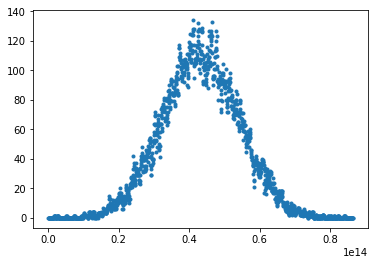

In [94]:
#Look at the number of calls that came in
plt.plot(dtable['time'],dtable['n_people'], marker='.', ls='none')

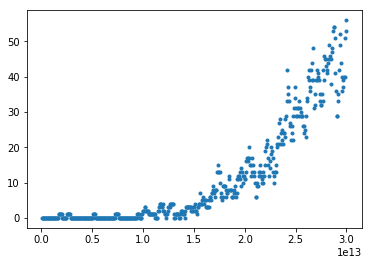

In [95]:
#Take the first 100 points
dbase = dtable.iloc[:500,:]
plt.plot(dbase['time'],dbase['n_people'], marker='.', ls='none')

In [96]:
dtable.iloc[500:520, :]

,time,n_people
500,08:21:00,58
501,08:22:00,64
502,08:23:00,69
503,08:24:00,72
504,08:25:00,70
505,08:26:00,63
506,08:27:00,64
507,08:28:00,58
508,08:29:00,53
509,08:30:00,52


### 1st question: Number of agents needed to ensure 0 waiting time

In [98]:
print "Number:", dtable['n_people'].max()+1, "agents"

Number: 135 agents


### 2nd question: Number of agents needed to ensure 10 min maximum waiting time

For maximum assurance, we take the maximum time taken by a caller within the timeframe to denote the number of calls made by an agent within a period of 10 minutes, and therefore the number of agents for which a caller would wait for a maximum of 10 minutes.

In [184]:
dtable['max_time'] = dtable['time'].apply(lambda x: np.max(data[(data['starttime'] <= x) & (data['endtime'] > x)]['Duration of calls']))

In [185]:
dtable['max_time'].fillna(0, inplace=True)

In [187]:
dtable['n_people10'] = dtable['n_people']/(10/dtable['max_time'])

In [188]:
#For visualization, here is a snapshot of where the number of engaged callers is at the highest:
dtable[dtable['n_people'] > 125]

,time,n_people,n_incoming,n_outgoing,avg_time,max_time,n_people10
683,11:24:00,127,25,22,5.464567,7.0,88.9
684,11:25:00,134,27,20,5.410448,8.0,107.2
685,11:26:00,128,21,27,5.476562,8.0,102.4
686,11:27:00,128,20,20,5.429688,8.0,102.4
707,11:48:00,127,27,23,5.267717,7.0,88.9
708,11:49:00,127,21,21,5.338583,7.0,88.9
709,11:50:00,132,33,28,5.204545,7.0,92.4
710,11:51:00,128,21,25,5.265625,8.0,102.4
723,12:04:00,127,35,19,5.251969,8.0,101.6
724,12:05:00,126,20,21,5.333333,8.0,100.8


In [197]:
import math
print "Number:", math.ceil(dtable['n_people10'].max()),"agents"

Number: 108.0 agents
